# Decision Tree Algorithm
- A decision tree algorithm make a tree like structure for the classification & regression of dataset in binary class.
- It is a machine learning algorithm
- It is a supervised learning algorithm.
- It is a type of tree-based algorithm.
- It is a type of ensemble learning algorithm.
- It is a type of regression algorithm (Decision Tree Regressor).
- It also the part of classification algorithm (Decision Tree Classifier).


## Decision Tree Algorithm key point
- Decision Trees are a type of supervised learning algorithm that can be used for both classification and regression tasks.
- Decision Trees work by recursively partitioning the data into smaller subsets based on the most informative feature.
- The algorithm selects the feature that best splits the data and creates a new node for it. The process
continues until all instances in the training set have been classified or a stopping criterion is met.
- Decision Trees are a popular choice for many machine learning tasks due to their simplicity, interpretability, and
ability to handle both categorical and numerical data.
- Decision Trees are a type of supervised learning algorithm that can be used for both classification and regression tasks.
- Decision Trees work by recursively partitioning the data into smaller subsets based on the most informative feature.
- The algorithm selects the feature that best splits the data and creates a new node for it. The process
continues until all instances in the training set have been classified or a stopping criterion is met.
- Decision Trees are a popular choice for many machine learning tasks due to their simplicity, interpretability, and
ability to handle both categorical and numerical data.
    

### Methods used in Decision Tree Algorithm:
1. **Root Node Selection**: The root node is the starting point of the decision tree. It
is the node that contains all the training data. The root node is selected based on the
most informative feature, which is the feature that best separates the classes in the
training data.
2. **Splitting the Data**: Once the root node is selected, the data is split into
subsets based on the feature selected in the previous step. Each subset is called a child node.
3. **Stopping Criteria**: The decision tree algorithm stops splitting the data when all
instances in a node belong to the same class or when a stopping criterion is met, such as
when the number of instances in a node is less than a certain threshold.
4. **Leaf Node Creation**: When the decision tree algorithm stops splitting the data, a leaf node
is created. The leaf node represents a class label or a predicted value.
5. **Backward Pruning**: After the decision tree is constructed, backward pruning is performed to
remove any branches that do not contribute to the accuracy of the model.
### Example Use Cases
1. **Customer Segmentation**: Decision trees can be used to segment customers based on their
demographic and behavioral characteristics, such as age, income, and purchase history.
2. **Credit Risk Assessment**: Decision trees can be used to assess the creditworthiness of
customers based on their credit history, income, and other relevant factors.
3. **Medical Diagnosis**: Decision trees can be used to diagnose diseases based on symptoms,
medical history, and other relevant factors.
### Advantages
1. **Interpretability**: Decision trees are easy to interpret and understand, as the decision-making
process is transparent and easy to follow.
2. **Handling Missing Values**: Decision trees can handle missing values in the data, as they can
be treated as a separate class or feature.
3. **Handling Non-Linear Relationships**: Decision trees can handle non-linear relationships between
features, as they can be split into multiple branches.
### Disadvantages
1. **Overfitting**: Decision trees can suffer from overfitting, especially when the number
of features is large compared to the number of instances.
2. **Handling High-Dimensional Data**: Decision trees can struggle with high-dimensional data,
as the number of features can lead to overfitting and poor performance.
### Real-World Applications
1. **Marketing**: Decision trees can be used to segment customers and predict their behavior.
2. **Finance**: Decision trees can be used to assess creditworthiness and predict loan defaults.
3. **Healthcare**: Decision trees can be used to diagnose diseases and predict patient outcomes.
### Conclusion
Decision trees are a popular machine learning algorithm used for classification and regression tasks. They are easy to interpret
and understand, and can handle missing values and non-linear relationships. However, they can suffer from over
fitting and struggle with high-dimensional data. Decision trees have a wide range of applications in marketing,
finance, and healthcare, and are a valuable tool for data analysts and machine learning practitioners.


***Import the Libraries***

In [104]:
#Import the libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Decision Tree Classifier:
The decision tree classifier is a type of supervised learning algorithm that uses a tree-like model to classify data
into different classes. It works by recursively partitioning the data into smaller subsets based on the values of
the input features.


***Import the Machine Learning Libraries from sklearn***

In [105]:
#Import the decision tree classifier:
from sklearn.tree import DecisionTreeClassifier 
#Import train test split:
from sklearn.model_selection import train_test_split
#Import the metrics for classification:
from sklearn.metrics import confusion_matrix, classification_report
#Import the preprocessing methods:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
#Import the imputation Libraries:
from sklearn.impute import SimpleImputer

In [106]:
#Load the dataset from the seaborn:
df = sns.load_dataset('titanic')

In [107]:
#Check the data:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
#Check the missing values:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [109]:
#Drop the deck column , due to missing values:
df.drop('deck', axis=1, inplace=True)

In [110]:
#impute the missing values of of age with median:
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])
#Impute the missing values of embarked & embark town with mode:
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked', 'embark_town']] = imputer.fit_transform(df[['embarked', 'embark_town']])

In [111]:
#Check the missing values of data:
print(df.isnull().sum().sort_values(ascending=False))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [112]:
#Enocode the columns in category and object:
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']) :
    df[col] = le.fit_transform(df[col])

In [113]:
#Number of columns:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [114]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int64  
 12  alive        891 non-null    int64  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(10)
memory usage: 85.4 KB


In [115]:
#Split the data into X and y :
X = df.drop('survived', axis=1)
y = df['survived']

In [116]:
#Apply the train, test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
#Create the model of Decision Tree Classifier:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
#Train the model using the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [118]:
#Predict the model:
y_pred = model.predict(X_test)

In [119]:
#Evalution of model:
print("Classification Report: \n",classification_report(y_pred, y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred, y_test))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Confusion Matrix: 
 [[105   0]
 [  0  74]]


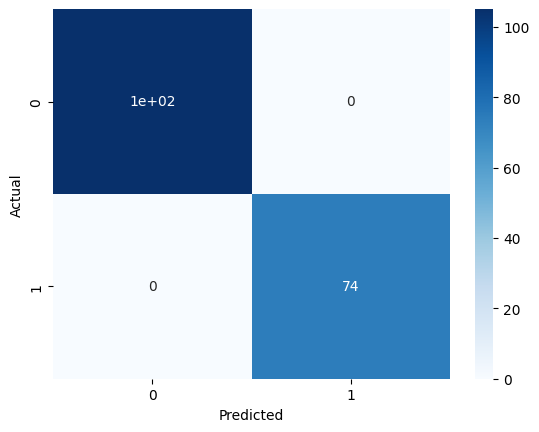

In [120]:
# Make a heatmap of Confusion Matrix:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [121]:
# Save the decision tree:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="Decision_tree.dot", feature_names=X.columns, filled=True, rounded=True)

In [122]:
# Save in the folder decision tree:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="./saved_models/Decision_tree.dot", feature_names=X.columns, filled=True, rounded=True)